In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "./data/station.csv"
df = pd.read_csv(path)
df.head()

,Datetime,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
0,11/25/2017 9:00,104.00,148.50,23.00,0.1,15.30,117.62,155.0,Moderate
1,11/25/2017 10:00,94.50,142.00,16.25,0.1,17.00,136.23,159.0,Moderate
2,11/25/2017 11:00,82.75,126.50,14.83,0.1,15.40,149.92,173.0,Moderate
3,11/25/2017 14:00,68.50,117.00,13.60,0.1,21.80,161.70,191.0,Moderate
4,11/25/2017 15:00,69.25,112.25,11.80,0.1,21.38,161.68,191.0,Moderate


In [3]:
df.columns

Index(['Datetime', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI',
       'AQI_Bucket'],
      dtype='object')

## Check Missing Value

In [4]:
# Check for missing values
df.isnull().sum()

Datetime           0
PM2.5         248387
PM10          342733
NO2           217130
CO            221047
SO2           384224
O3            250486
AQI           239528
AQI_Bucket    239528
dtype: int64

In [5]:
# เช็ดว่าเป็น Dtype อะไรบ้าง
df.dtypes

Datetime       object
PM2.5         float64
PM10          float64
NO2           float64
CO            float64
SO2           float64
O3            float64
AQI           float64
AQI_Bucket     object
dtype: object

In [6]:
# prompt: ทำ Linear Interpolation ที่ค่าเป็น null

# Linear Interpolation for null values in specific columns
for col in ['PM2.5', 'PM10', 'O3', 'CO', 'NO2', 'SO2']:  # Replace with your actual column names
    df[col] = df[col].interpolate(method='linear', limit_direction='both')


## Data Visualization

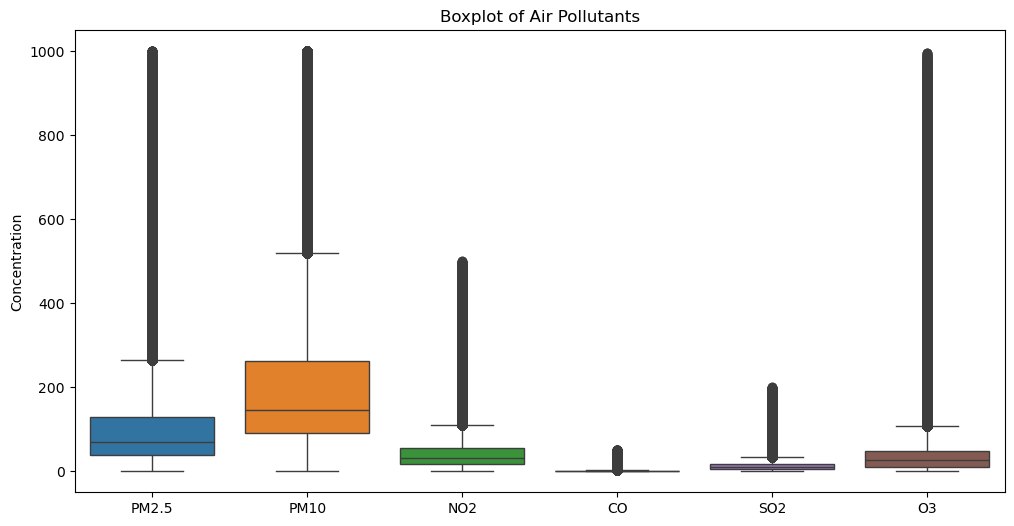

In [7]:
# prompt: ทำกราฟ boxplot ของ PM2.5    PM10        NO2        CO       SO2         O3

# Create a boxplot for PM2.5, PM10, NO2, CO, SO2, and O3
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']])
plt.title('Boxplot of Air Pollutants')
plt.ylabel('Concentration')
plt.show()


In [8]:
def replace_outliers_with_quartiles(df):

    for column in df.select_dtypes(include=['number']).columns:

        # Used to cycle through all numeric columns in the DataFrame.

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # To identify outliers, lower and upper limits are calculated and values ​​
        # outside these limits are considered outliers.

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # For each column, we identify outliers and replace them with Q1 or Q3.
        # We do this using a lambda function. If the value is less than the lower bound,
        #it is replaced with Q1. If it is greater than the upper bound,
        #it is replaced with Q3.
        #In the last case, the value is not changed and remains the same.

        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )

    return df

df = replace_outliers_with_quartiles(df)

<Axes: >

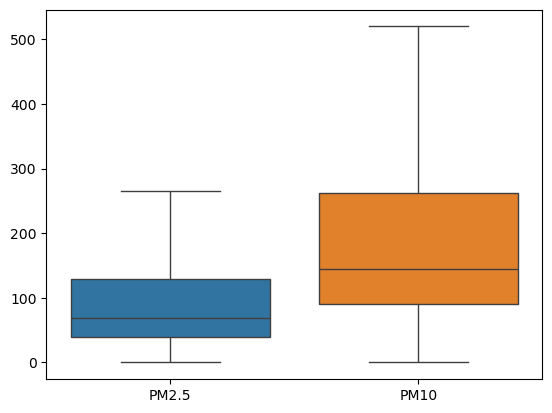

In [9]:
sns.boxplot(data=df[['PM2.5','PM10']])

## Feature Engineering

In [10]:
# prompt: ใช้สูตรนี้ คำนวณ o3(ugm3 * 24.45) /  48

# Calculate the new column based on the formula
df['O3'] = (df['O3'] * 24.45) / 48


In [11]:
# prompt: ใช้สูตรนี้ คำนวณ SO2 (ugm3 * 24.45) /  64.07

df['SO2'] = (df['SO2'] * 24.45) / 64.07


In [12]:
# prompt: ใช้สูตรนี้ คำนวณ NO2 (ugm3 * 24.45) /  46.01

# Calculate the new column based on the formula
df['NO2'] = (df['NO2'] * 24.45) / 46.01


In [13]:
# prompt: ใช้สูตรนี้ คำนวณ CO (ugm3 * 24.45) / (28.01 * 1000)

# Calculate the new column based on the formula
df['CO'] = (df['CO'] * 24.45) / (28.01 * 1000)


In [14]:
df

,Datetime,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
0,11/25/2017 9:00,104.00,148.50,12.222343,0.000087,5.838692,25.188594,155.0,Moderate
1,11/25/2017 10:00,94.50,142.00,8.635351,0.000087,6.487436,25.188594,159.0,Moderate
2,11/25/2017 11:00,82.75,126.50,7.880754,0.000087,5.876853,25.188594,173.0,Moderate
3,11/25/2017 14:00,68.50,117.00,7.227125,0.000087,8.319182,25.188594,191.0,Moderate
4,11/25/2017 15:00,69.25,112.25,6.270593,0.000087,8.158904,25.188594,191.0,Moderate
...,...,...,...,...,...,...,...,...,...
1048552,5/8/2018 13:00,36.00,106.00,6.764489,0.000079,0.293366,40.262910,297.0,Poor
1048553,5/8/2018 14:00,31.00,114.00,6.587874,0.000087,0.275716,47.306930,290.0,Poor
1048554,5/8/2018 15:00,35.00,112.00,6.411260,0.000096,0.258066,54.350949,283.0,Poor
1048555,5/8/2018 16:00,44.00,108.00,6.234645,0.000175,0.240417,25.188594,272.0,Poor


In [15]:
import pandas as pd

def calculate_aqi(concentration, breakpoints):
    """คำนวณ AQI จากค่าเข้มข้นของมลพิษตามมาตรฐาน US AQI"""
    if pd.isna(concentration) or concentration < 0:
        return None  # กรณีค่าเป็น NaN หรือค่าติดลบ ให้คืนค่า None

    for i in range(len(breakpoints) - 1):
        C_low, C_high = breakpoints[i][0], breakpoints[i+1][0]
        I_low, I_high = breakpoints[i][1], breakpoints[i+1][1]
        if C_low <= concentration <= C_high:
            aqi = ((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low
            return round(aqi)

    return 500  # ถ้าเกินช่วง ให้จำกัดที่ 500

# กำหนดช่วงค่า AQI สำหรับแต่ละมลพิษ (US AQI)
breakpoints = {
    "PM2.5": [(0, 0), (12.0, 50), (35.4, 100), (55.4, 150), (150.4, 200), (250.4, 300), (350.4, 400), (500.4, 500)],
    "PM10": [(0, 0), (54, 50), (154, 100), (254, 150), (354, 200), (424, 300), (504, 400), (604, 500)],
    "NO2": [(0, 0), (53, 50), (100, 100), (360, 150), (649, 200), (1249, 300), (2049, 400), (4049, 500)],
    "CO": [(0, 0), (4.4, 50), (9.4, 100), (12.4, 150), (15.4, 200), (30.4, 300), (40.4, 400), (50.4, 500)],
    "SO2": [(0, 0), (35, 50), (75, 100), (185, 150), (304, 200), (604, 300), (804, 400), (1004, 500)],
    "O3": [(0, 0), (54, 50), (70, 100), (85, 150), (105, 200), (200, 300), (300, 400), (400, 500)]
}

# คำนวณ AQI ของแต่ละมลพิษ
for pollutant in breakpoints.keys():
    df[f"AQI_{pollutant}"] = df[pollutant].apply(lambda x: calculate_aqi(x, breakpoints[pollutant]))

# หาค่า AQI สูงสุดเป็น AQI สุดท้าย
df["AQI_Final"] = df[[f"AQI_{p}" for p in breakpoints.keys()]].max(axis=1)

# แสดงผลลัพธ์
print(df)


                 Datetime   PM2.5    PM10        NO2        CO       SO2  \
0         11/25/2017 9:00  104.00  148.50  12.222343  0.000087  5.838692   
1        11/25/2017 10:00   94.50  142.00   8.635351  0.000087  6.487436   
2        11/25/2017 11:00   82.75  126.50   7.880754  0.000087  5.876853   
3        11/25/2017 14:00   68.50  117.00   7.227125  0.000087  8.319182   
4        11/25/2017 15:00   69.25  112.25   6.270593  0.000087  8.158904   
...                   ...     ...     ...        ...       ...       ...   
1048552    5/8/2018 13:00   36.00  106.00   6.764489  0.000079  0.293366   
1048553    5/8/2018 14:00   31.00  114.00   6.587874  0.000087  0.275716   
1048554    5/8/2018 15:00   35.00  112.00   6.411260  0.000096  0.258066   
1048555    5/8/2018 16:00   44.00  108.00   6.234645  0.000175  0.240417   
1048556    5/8/2018 17:00   52.00  111.00   6.058031  0.000306  0.919689   

                O3    AQI AQI_Bucket  AQI_PM2.5  AQI_PM10  AQI_NO2  AQI_CO  \
0        

In [16]:
df

,Datetime,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket,AQI_PM2.5,AQI_PM10,AQI_NO2,AQI_CO,AQI_SO2,AQI_O3,AQI_Final
0,11/25/2017 9:00,104.00,148.50,12.222343,0.000087,5.838692,25.188594,155.0,Moderate,176,97,12,0,8,23,176
1,11/25/2017 10:00,94.50,142.00,8.635351,0.000087,6.487436,25.188594,159.0,Moderate,171,94,8,0,9,23,171
2,11/25/2017 11:00,82.75,126.50,7.880754,0.000087,5.876853,25.188594,173.0,Moderate,164,86,7,0,8,23,164
3,11/25/2017 14:00,68.50,117.00,7.227125,0.000087,8.319182,25.188594,191.0,Moderate,157,82,7,0,12,23,157
4,11/25/2017 15:00,69.25,112.25,6.270593,0.000087,8.158904,25.188594,191.0,Moderate,157,79,6,0,12,23,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048552,5/8/2018 13:00,36.00,106.00,6.764489,0.000079,0.293366,40.262910,297.0,Poor,102,76,6,0,0,37,102
1048553,5/8/2018 14:00,31.00,114.00,6.587874,0.000087,0.275716,47.306930,290.0,Poor,91,80,6,0,0,44,91
1048554,5/8/2018 15:00,35.00,112.00,6.411260,0.000096,0.258066,54.350949,283.0,Poor,99,79,6,0,0,51,99
1048555,5/8/2018 16:00,44.00,108.00,6.234645,0.000175,0.240417,25.188594,272.0,Poor,122,77,6,0,0,23,122


In [17]:
# prompt: drop no nox nh3

# Drop columns 'NOx', 'NO', 'NH3'
df = df.drop(['AQI'], axis=1)


In [18]:
# prompt: ทำ AQI bucketing

def aqi_bucket(aqi_value):
  """
  Buckets AQI values into categories.
  """
  if aqi_value <= 50:
    return "Good"
  elif aqi_value <= 100:
    return "Moderate"
  elif aqi_value <= 150:
    return "Unhealthy for Sensitive Groups"
  elif aqi_value <= 200:
    return "Unhealthy"
  elif aqi_value <= 300:
    return "Very Unhealthy"
  else:
    return "Hazardous"

# Apply the function to create the new 'AQI_Bucket' column
df['AQI_Bucket'] = df['AQI_Final'].apply(aqi_bucket)


In [19]:
df

,Datetime,PM2.5,PM10,NO2,CO,SO2,O3,AQI_Bucket,AQI_PM2.5,AQI_PM10,AQI_NO2,AQI_CO,AQI_SO2,AQI_O3,AQI_Final
0,11/25/2017 9:00,104.00,148.50,12.222343,0.000087,5.838692,25.188594,Unhealthy,176,97,12,0,8,23,176
1,11/25/2017 10:00,94.50,142.00,8.635351,0.000087,6.487436,25.188594,Unhealthy,171,94,8,0,9,23,171
2,11/25/2017 11:00,82.75,126.50,7.880754,0.000087,5.876853,25.188594,Unhealthy,164,86,7,0,8,23,164
3,11/25/2017 14:00,68.50,117.00,7.227125,0.000087,8.319182,25.188594,Unhealthy,157,82,7,0,12,23,157
4,11/25/2017 15:00,69.25,112.25,6.270593,0.000087,8.158904,25.188594,Unhealthy,157,79,6,0,12,23,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048552,5/8/2018 13:00,36.00,106.00,6.764489,0.000079,0.293366,40.262910,Unhealthy for Sensitive Groups,102,76,6,0,0,37,102
1048553,5/8/2018 14:00,31.00,114.00,6.587874,0.000087,0.275716,47.306930,Moderate,91,80,6,0,0,44,91
1048554,5/8/2018 15:00,35.00,112.00,6.411260,0.000096,0.258066,54.350949,Moderate,99,79,6,0,0,51,99
1048555,5/8/2018 16:00,44.00,108.00,6.234645,0.000175,0.240417,25.188594,Unhealthy for Sensitive Groups,122,77,6,0,0,23,122


In [20]:
# prompt: ทำ label encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'AQI_Bucket' column
df['AQI_Bucket_Encoded'] = label_encoder.fit_transform(df['AQI_Bucket'])

# Print the head to verify
print(df.head())


           Datetime   PM2.5    PM10        NO2        CO       SO2         O3  \
0   11/25/2017 9:00  104.00  148.50  12.222343  0.000087  5.838692  25.188594   
1  11/25/2017 10:00   94.50  142.00   8.635351  0.000087  6.487436  25.188594   
2  11/25/2017 11:00   82.75  126.50   7.880754  0.000087  5.876853  25.188594   
3  11/25/2017 14:00   68.50  117.00   7.227125  0.000087  8.319182  25.188594   
4  11/25/2017 15:00   69.25  112.25   6.270593  0.000087  8.158904  25.188594   

  AQI_Bucket  AQI_PM2.5  AQI_PM10  AQI_NO2  AQI_CO  AQI_SO2  AQI_O3  \
0  Unhealthy        176        97       12       0        8      23   
1  Unhealthy        171        94        8       0        9      23   
2  Unhealthy        164        86        7       0        8      23   
3  Unhealthy        157        82        7       0       12      23   
4  Unhealthy        157        79        6       0       12      23   

   AQI_Final  AQI_Bucket_Encoded  
0        176                   3  
1        171    

* Good : 0
* Moderate : 1
* Unhealthy for Sensitive Groups : 2
* Unhealthy : 3
* Very Unhealthy : 4
* Hazardous : 5

In [21]:
enc_columns = ['AQI_PM2.5', 'AQI_PM10' , 'AQI_NO2' , 'AQI_CO', 'AQI_SO2' , 'AQI_O3']
X = df[enc_columns]
X.head()

,AQI_PM2.5,AQI_PM10,AQI_NO2,AQI_CO,AQI_SO2,AQI_O3
0,176,97,12,0,8,23
1,171,94,8,0,9,23
2,164,86,7,0,8,23
3,157,82,7,0,12,23
4,157,79,6,0,12,23


In [22]:
y = df['AQI_Bucket_Encoded']
y

0          3
1          3
2          3
3          3
4          3
          ..
1048552    4
1048553    2
1048554    2
1048555    4
1048556    4
Name: AQI_Bucket_Encoded, Length: 1048557, dtype: int32

## Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [24]:
X_train.shape , X_test.shape

((733989, 6), (314568, 6))

In [25]:
y_train.shape , y_test.shape

((733989,), (314568,))

In [26]:
X_train

,AQI_PM2.5,AQI_PM10,AQI_NO2,AQI_CO,AQI_SO2,AQI_O3
979413,170,106,5,0,6,24
710061,229,162,40,0,1,46
735076,143,95,17,0,4,23
900981,161,109,19,0,3,1
147658,85,38,19,0,6,3
...,...,...,...,...,...,...
744348,117,119,4,0,1,26
285919,176,105,17,0,6,20
37135,179,120,1,0,6,0
879066,185,122,19,0,5,6


In [27]:
y_train

979413     3
710061     5
735076     4
900981     3
147658     2
          ..
744348     4
285919     3
37135      3
879066     3
1031523    5
Name: AQI_Bucket_Encoded, Length: 733989, dtype: int32

In [28]:
X_test

,AQI_PM2.5,AQI_PM10,AQI_NO2,AQI_CO,AQI_SO2,AQI_O3
846024,133,60,7,0,4,7
973736,72,64,3,0,3,23
429528,104,83,6,0,1,8
293129,204,159,6,0,5,7
730192,169,114,27,0,5,23
...,...,...,...,...,...,...
349916,146,154,3,0,1,1
491864,170,89,19,0,3,13
864697,187,108,9,0,7,7
393313,153,100,16,0,6,8


In [29]:
# prompt: 	AQI_PM10	AQI_PM2.5	AQI_CO นับข้อมูลหน่อย

# Count the occurrences of each AQI category for PM10, PM2.5, and CO
aqi_counts = df[['AQI_Bucket_Encoded']].value_counts()

aqi_counts


AQI_Bucket_Encoded
3                     454475
2                     192229
4                     181759
5                     143475
1                      52190
0                      24429
Name: count, dtype: int64

In [30]:
# prompt: y_train นับข้อมูลหน่อย

print(y_train.shape)
print(y_train.value_counts())


(733989,)
AQI_Bucket_Encoded
3    318256
2    134458
4    127450
5    100262
1     36581
0     16982
Name: count, dtype: int64


In [31]:
y_test

846024    4
973736    2
429528    4
293129    5
730192    3
         ..
349916    3
491864    3
864697    3
393313    3
412519    2
Name: AQI_Bucket_Encoded, Length: 314568, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib  # สำหรับบันทึกโมเดล

# 📌 Standardize ข้อมูล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [33]:
# 📌 ใช้ PCA ลดมิติ (ถ้าจำนวน feature เยอะ)
pca = PCA(n_components=5)  # ลดเหลือ 5 มิติ (ปรับตาม dataset)
X_train_pca = pca.fit_transform(X_train_scaled)

In [34]:
# 📌 Train KNN ด้วย K ที่ดีที่สุด
knn = KNeighborsClassifier(n_neighbors=8, weights="distance")
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

✅ Accuracy: 0.9656799165840136
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      7447
           1       0.97      0.96      0.97     15609
           2       0.97      0.98      0.97     57771
           3       0.96      0.99      0.98    136219
           4       0.97      0.91      0.94     54309
           5       0.98      0.94      0.96     43213

    accuracy                           0.97    314568
   macro avg       0.97      0.95      0.96    314568
weighted avg       0.97      0.97      0.97    314568



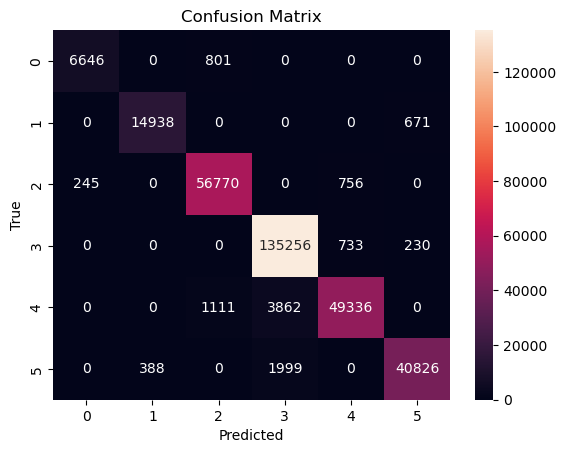

In [35]:
# prompt: จะทดสอบความแม่นยำ

# 📌 ทดสอบโมเดลกับข้อมูลทดสอบ
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
y_pred = knn.predict(X_test_pca)

# 📌 วัดความแม่นยำ
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# แสดง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Cross-validation scores: [0.96506764 0.96414801 0.96407989 0.9640254  0.96323494]
Mean cross-validation score: 0.9641111775840863
Training Accuracy: 0.9641111787778835
Model does not appear to be overfitting significantly.


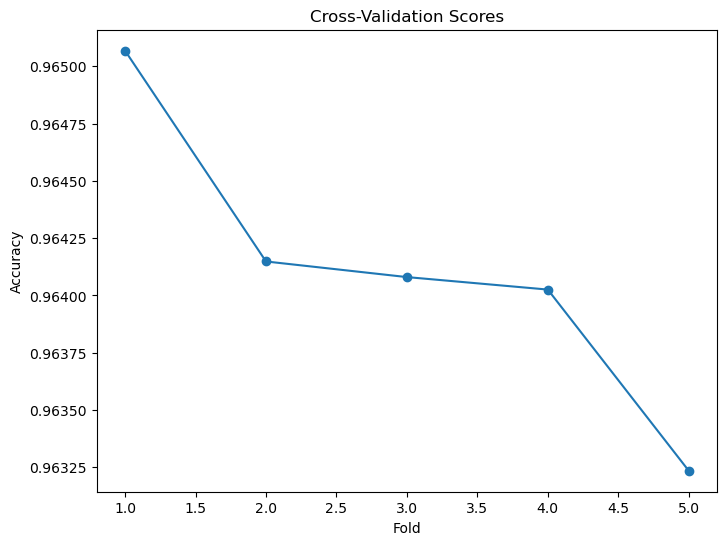

In [36]:
# prompt: จะดูว่า overfitting มั้ย

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code)

# 📌 Train KNN with the best K
knn = KNeighborsClassifier(n_neighbors=8, weights="distance")
# Use cross-validation to evaluate the model's performance.
cv_scores = cross_val_score(knn, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")
y_pred_cv = cross_val_predict(knn, X_train_pca, y_train, cv=5) # prediction from cross validation set

# ... (rest of your existing code for training, testing, and evaluation)


# Calculate and print the training accuracy
training_accuracy = accuracy_score(y_train, y_pred_cv)
print(f"Training Accuracy: {training_accuracy}")

# Compare the training accuracy to the test accuracy
if abs(training_accuracy - accuracy) > 0.1:
  print("Warning: There may be overfitting. Training accuracy is significantly higher than test accuracy.")
elif training_accuracy > accuracy:
    print("Training accuracy is higher than test accuracy, potential overfitting.")
else:
    print("Model does not appear to be overfitting significantly.")

# Additional Visualization for Overfitting
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Scores")
plt.show()



In [ ]:
# prompt: โหลดโมเดล KNN โหลด Scaler โหลด PCA ใน local

import joblib

# Save the trained KNN model
joblib.dump(knn, 'knn_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the PCA
joblib.dump(pca, 'pca.pkl')

joblib.dump(label_encoder , 'label_encoder.pkl')

print("Model, scaler, and PCA saved successfully!")


Model, scaler, and PCA saved successfully!


In [3]:
import joblib

# Load the trained KNN model
knn = joblib.load('knn_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Load the PCA
pca = joblib.load('pca.pkl')


print("Model, scaler, and PCA loaded successfully!")

Model, scaler, and PCA loaded successfully!


In [ ]:
# Assuming your X_train_pca, scaler, pca, and knn are already defined and trained.

new_data = np.array([200, 15, 3, 0, 3, 23]).reshape(1, -1)  # Reshape to match the input format
new_data_scaled = scaler.transform(new_data)
new_data_pca = pca.transform(new_data_scaled)

predicted_aqi_bucket_encoded = knn.predict(new_data_pca)

# Decode the predicted encoded value to get the corresponding AQI bucket category
predicted_aqi_bucket = label_encoder.inverse_transform([predicted_aqi_bucket_encoded])[0]

print(f"Predicted AQI Bucket: {predicted_aqi_bucket}")

c:\Users\param\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


NameError: name 'predicted_aqi_bucket' is not defined